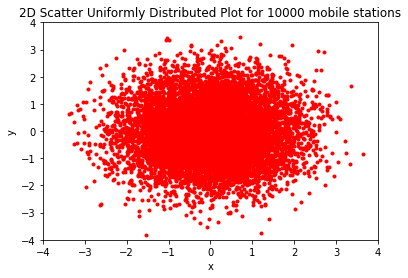

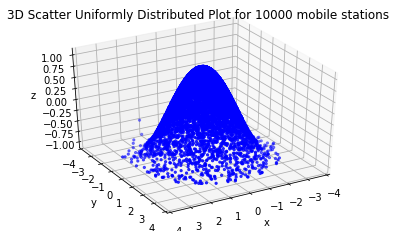

In [6]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import math
import matplotlib.pyplot as plt

"""
Assuming x and y are independent from a Normal distribution (0,1),
we apply Box-Müller transformation to rewrite our target distribution
with a different set of variables (r,ø) instead of (x,y).

This way we can sample under a Box-Müller transformed distribution and
then convert back to our target distribution.

Since we assume independence of x and y, we can also assume independence
of r and ø.

The outcome is that the function of the angle (ø) follows a uniform
distribution, and the function of the radius (r) follows an exponential
distribution, which can be expressed as the inverse transform of its
Cumulative Distribution Function.
"""

# N mobile stations
N = 10000
x = np.empty((0, N), float)
y = np.empty((0, N), float)

for i in range(0,N):
  # angle follows a uniform distribution from [0,2*pi]
  angle = np.random.uniform(0,2*math.pi)

  """
  The radius follows an exponential distribution with lambda rate of
  1/2 (commented below); however, it can also be expressed as the inverse
  transform of its CDF
  """

  # radius = np.random.exponential(1/2)
  radius = math.sqrt(-2*math.log(np.random.uniform(0,1)))

  # final calculations to get x and y values of the target distribution
  x = np.append(x, radius * math.cos(angle))
  y = np.append(y, radius * math.sin(angle))

# function used to calculate z value for each x and y for 3D plot
def f(x, y):
    return np.cos(np.sqrt(x ** 2 + y ** 2))

# 2D scatter plot
plt.plot(x, y, 'ro', marker='.')
plt.axis([-4, 4, -4, 4])

plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Scatter Uniformly Distributed Plot for {} mobile stations'.format(N))

# 3D scatter plot showing normal distribution resemblance
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z = f(x, y)
ax.scatter(x, y, z, c='b', marker='.')
ax.axis([-4, 4, -4, 4])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(
    '3D Scatter Uniformly Distributed Plot for {} mobile stations'.format(N))

# change perspective view of 3D plot
ax.view_init(35, 60)

plt.show()
